### Data engineering
### Dataset: Racket Sports
### Authors: Edgar Acuna  
### Created: March 25, 2025

In [160]:
# imports
import numpy as np
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 

In [161]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### Training dataset

In [163]:
# loading Training data
X, y = load_data("RacketSports",split="Train")

 Shape of X =  (151, 6, 30)
 Shape of y =  (151,)
 New shape of X =  (151, 30, 6)
 New shape of y =  (151, 4)


In [164]:
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
print(yo)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [165]:
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
print(X3.shape)

(34, 30, 6)


In [166]:
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
print(Xa3.shape)

(6, 30)


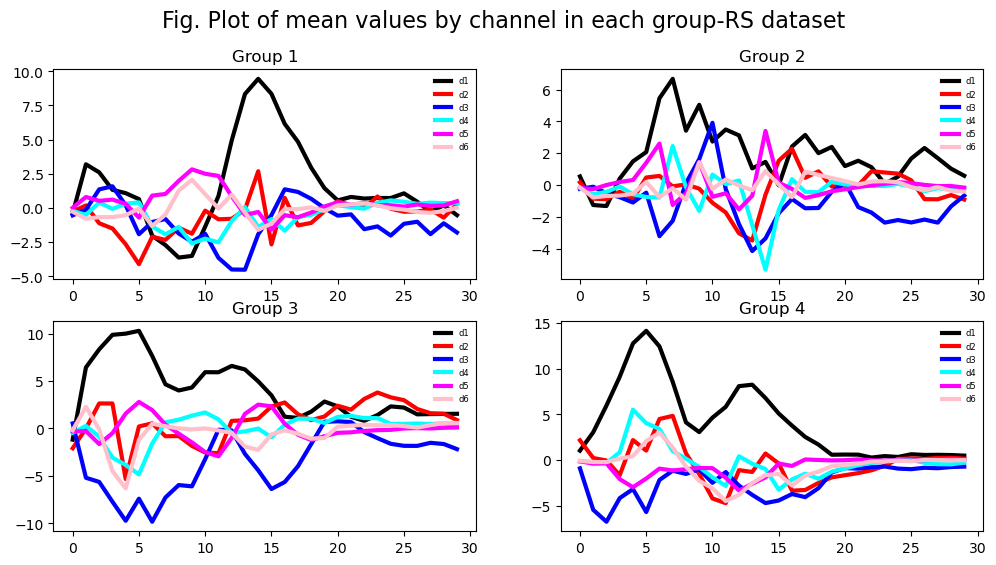

In [260]:
import matplotlib.pyplot as plt
%matplotlib inline
#fig, ax = plt.subplots(figsize=(20,10))
fig, ax = plt.subplots(2, 2,figsize=(12,6))
ejex=np.arange(0,30,1)
fig.suptitle("Fig. Plot of mean values by channel in each group-RS dataset",fontsize=16)
ax[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=3, label='d1')
ax[0,0].plot(ejex,Xa1.iloc[1,ejex], color='red', lw=3, label='d2')
ax[0,0].plot(ejex, Xa1.iloc[2,ejex], color='blue', lw=3, label='d3')
ax[0,0].plot(ejex, Xa1.iloc[3,ejex], color='cyan', lw=3, label='d4')
ax[0,0].plot(ejex,Xa1.iloc[4,ejex], color='magenta', lw=3, label='d5')
ax[0,0].plot(ejex, Xa1.iloc[5,ejex], color='pink', lw=3, label='d6')
ax[0,0].set_title("Group 1")
ax[0,0].legend(loc='best', frameon=False, fontsize=6)
ax[0,1].plot(ejex, Xa2.iloc[0,ejex], color='black', lw=3, label='d1')
ax[0,1].plot(ejex, Xa2.iloc[1,ejex], color='red',lw=3, label='d2')
ax[0,1].plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=3, label='d3')
ax[0,1].plot(ejex, Xa2.iloc[3,ejex], color='cyan',lw=3, label='d4')
ax[0,1].plot(ejex,Xa2.iloc[4,ejex], color='magenta', lw=3, label='d5')
ax[0,1].plot(ejex, Xa2.iloc[5,ejex], color='pink', lw=3, label='d6')
ax[0,1].set_title("Group 2")
ax[0,1].legend(loc='best', frameon=False,fontsize=6)
ax[1,0].plot(ejex, Xa3.iloc[0,ejex], color='black',lw=3, label='d1')
ax[1,0].plot(ejex,Xa3.iloc[1,ejex], color='red', lw=3, label='d2')
ax[1,0].plot(ejex, Xa3.iloc[2,ejex], color='blue', lw=3, label='d3')
ax[1,0].plot(ejex, Xa3.iloc[3,ejex], color='cyan',lw=3, label='d4')
ax[1,0].plot(ejex,Xa3.iloc[4,ejex], color='magenta', lw=3, label='d5')
ax[1,0].plot(ejex, Xa3.iloc[5,ejex], color='pink', lw=3, label='d6')
ax[1,0].set_title("Group 3")
ax[1,0].legend(loc='best', frameon=False,fontsize=6)
ax[1,1].plot(ejex, Xa4.iloc[0,ejex], color='black',lw=3, label='d1')
ax[1,1].plot(ejex,Xa4.iloc[1,ejex], color='red', lw=3, label='d2')
ax[1,1].plot(ejex, Xa4.iloc[2,ejex], color='blue',lw=3, label='d3')
ax[1,1].plot(ejex,Xa4.iloc[3,ejex], color='cyan', lw=3, label='d4')
ax[1,1].plot(ejex, Xa4.iloc[4,ejex], color='magenta',lw=3, label='d5')
ax[1,1].plot(ejex,Xa4.iloc[5,ejex], color='pink', lw=3, label='d6')
ax[1,1].set_title("Group 4")
ax[1,1].legend(loc='best', frameon=False,fontsize=6)
plt.show()

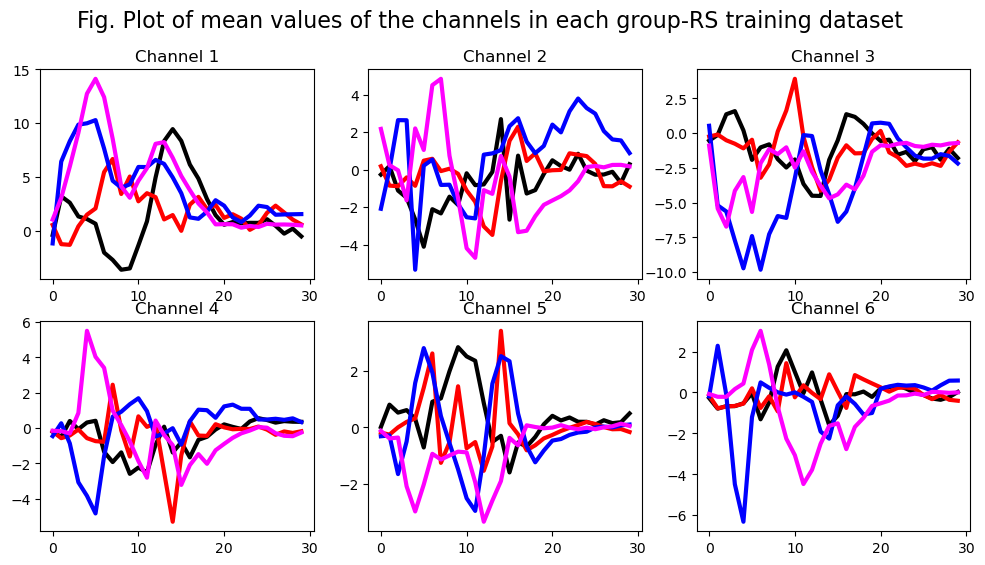

In [168]:
fig, axs = plt.subplots(2, 3,figsize=(12,6))
ejex=np.arange(0,30,1)
fig.suptitle("Fig. Plot of mean values of the channels in each group-RS training dataset",fontsize=16)
axs[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=3, label='G1')
axs[0,0].plot(ejex,Xa2.iloc[0,ejex], color='red', lw=3,  label='G1')
axs[0,0].plot(ejex, Xa3.iloc[0,ejex], color='blue', lw=3, label='G1')
axs[0,0].plot(ejex, Xa4.iloc[0,ejex], color='magenta', lw=3,  label='G4')
axs[0,0].set_title("Channel 1")
axs[0,1].plot(ejex, Xa1.iloc[1,ejex], color='black',lw=3, label='G2')
axs[0,1].plot(ejex,Xa2.iloc[1,ejex], color='red', lw=3,   label='G2')
axs[0,1].plot(ejex, Xa3.iloc[1,ejex], color='blue', lw=3, label='G2')
axs[0,1].plot(ejex, Xa4.iloc[1,ejex], color='magenta', lw=3,  label='G4')
axs[0,1].set_title("Channel 2")
axs[0,2].plot(ejex, Xa1.iloc[2,ejex], color='black',lw=3, label='G3')
axs[0,2].plot(ejex,Xa2.iloc[2,ejex], color='red', lw=3,  label='G3')
axs[0,2].plot(ejex, Xa3.iloc[2,ejex], color='blue', lw=3, label='G3')
axs[0,2].plot(ejex, Xa4.iloc[2,ejex], color='magenta', lw=3,  label='G4')
axs[0,2].set_title("Channel 3")
axs[1,0].plot(ejex, Xa1.iloc[3,ejex], color='black',lw=3, label='G1')
axs[1,0].plot(ejex,Xa2.iloc[3,ejex], color='red', lw=3,  label='G1')
axs[1,0].plot(ejex, Xa3.iloc[3,ejex], color='blue', lw=3, label='G1')
axs[1,0].plot(ejex, Xa4.iloc[3,ejex], color='magenta', lw=3,  label='G4')
axs[1,0].set_title("Channel 4")
axs[1,1].plot(ejex, Xa1.iloc[4,ejex], color='black',lw=3, label='G2')
axs[1,1].plot(ejex,Xa2.iloc[4,ejex], color='red', lw=3,   label='G2')
axs[1,1].plot(ejex, Xa3.iloc[4,ejex], color='blue', lw=3, label='G2')
axs[1,1].plot(ejex, Xa4.iloc[4,ejex], color='magenta', lw=3,  label='G4')
axs[1,1].set_title("Channel 5")
axs[1,2].plot(ejex, Xa1.iloc[5,ejex], color='black',lw=3, label='G3')
axs[1,2].plot(ejex,Xa2.iloc[5,ejex], color='red', lw=3,  label='G3')
axs[1,2].plot(ejex, Xa3.iloc[5,ejex], color='blue', lw=3, label='G3')
axs[1,2].plot(ejex, Xa4.iloc[5,ejex], color='magenta', lw=3,  label='G4')
axs[1,2].set_title("Channel 6")
#ax.legend(loc='best', frameon=False)
plt.show()
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

(4530, 6)


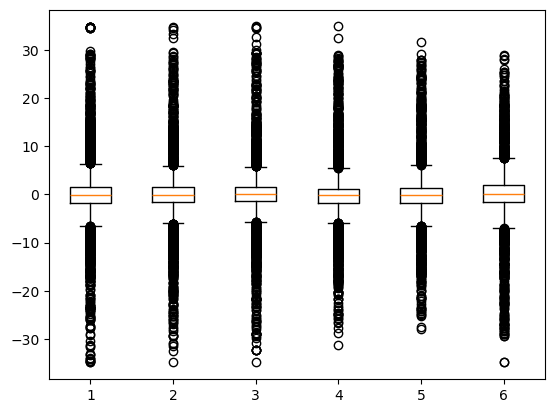

In [169]:
#Boxplots of the features in the training set
tempotr=X.reshape(X.shape[2],-1).T
tempodftr=pd.DataFrame(tempotr)
print(tempodftr.shape)
pyplot.boxplot(tempodftr)
pyplot.show()

In [170]:
#Boxplots of the features in each group of the training dataset 
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>,
        <Axes: title={'center': '3'}, xlabel='[group]'>],
       [<Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>]], dtype=object)

In [171]:
temptr.groupby('group').mean()

,0,1,2,3,4,5
group,,,,,,
0,-0.157754,0.149480,-0.135707,-0.057466,0.031637,0.184125
1,0.219257,-0.000413,-0.068481,0.009341,-0.025265,0.321035
2,0.268489,-0.121558,0.016240,-0.191962,0.146143,0.043701
3,-0.270770,-0.231364,0.090858,-0.032410,-0.107481,0.075530


### Distances between groups in training dataset

In [173]:
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.44223266, 0.57371854, 0.49083741, 0.41363701, 0.62259801,
       0.63183945])

In [174]:
distances.min()

0.41363701452021434

In [175]:
distances.max()

0.6318394474550408

In [176]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(906, 30)


In [177]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(30,)

In [178]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

### Feature Selection

In [180]:
#print(tempoB.shape)
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:30]
#scores = mutual_info_classif(Xm,ym)
#scores /= scores.max()
#importance=[i for i,v in enumerate(scores) if v > .5]
#len(importance)*100/206
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-value=.10
importance=[i for i,v in enumerate(scores) if v >1 ]
len(importance)*100/30

10.0

In [181]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:30]
scores = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/30

36.666666666666664

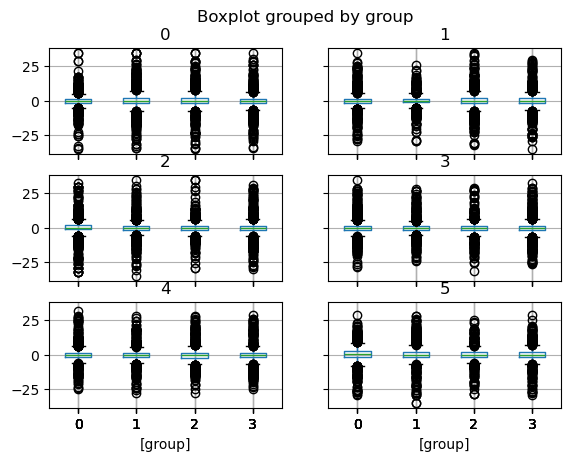

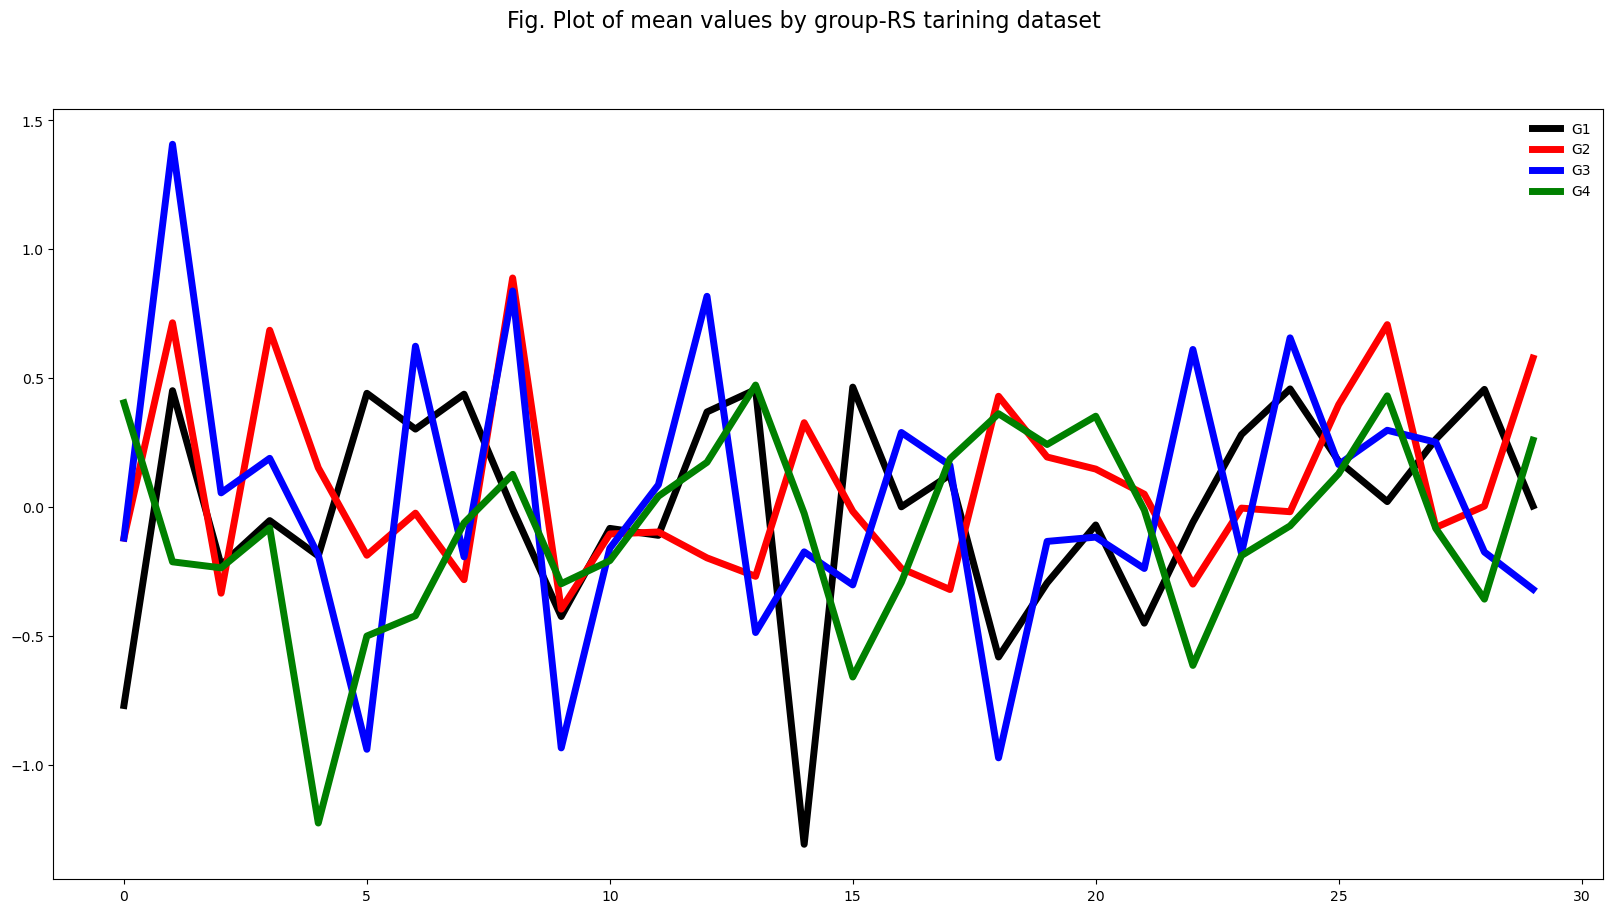

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,30,1)
fig.suptitle("Fig. Plot of mean values by group-RS tarining dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax.legend(loc='best', frameon=False)
plt.show()

### Testing dataset

In [184]:
# loading Testing data
Xt, yt = load_data("RacketSports",split="Test")

 Shape of X =  (152, 6, 30)
 Shape of y =  (152,)
 New shape of X =  (152, 30, 6)
 New shape of y =  (152, 4)


In [185]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [186]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([43, 40, 34, 35])

In [187]:
ar=np.sum(yt,axis=0)
np.max(ar/Xt.shape[0])

0.28289473684210525

(4560, 6)


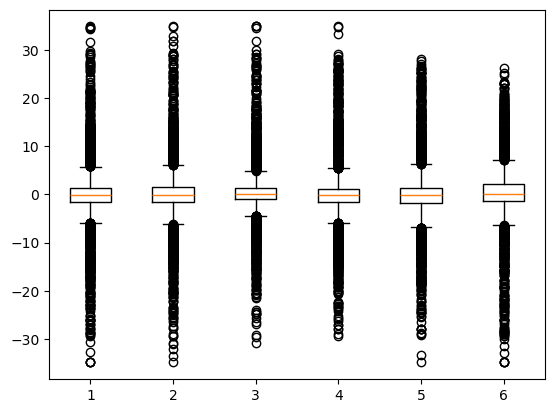

In [188]:
#Boxplots of features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
pyplot.boxplot(tempodfte)
pyplot.show()

In [189]:
#Boxplots of features in each group of the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>,
        <Axes: title={'center': '3'}, xlabel='[group]'>],
       [<Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>]], dtype=object)

In [190]:
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>,
        <Axes: title={'center': '3'}, xlabel='[group]'>],
       [<Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>]], dtype=object)

In [191]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(912, 30)


In [192]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

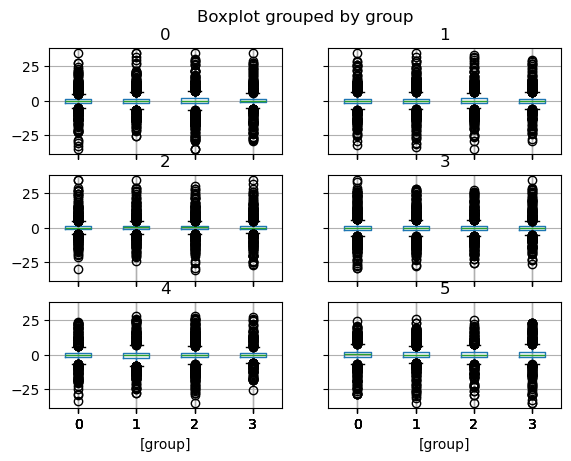

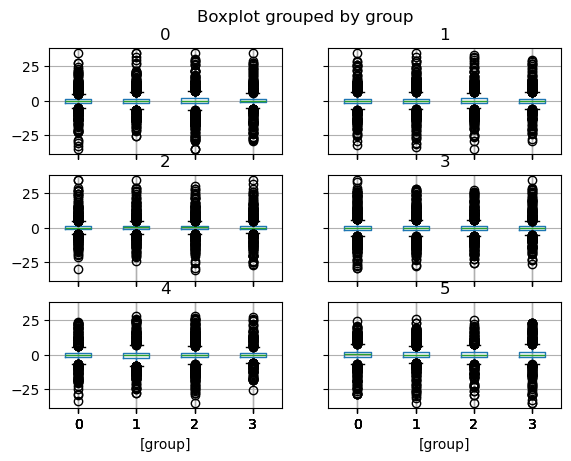

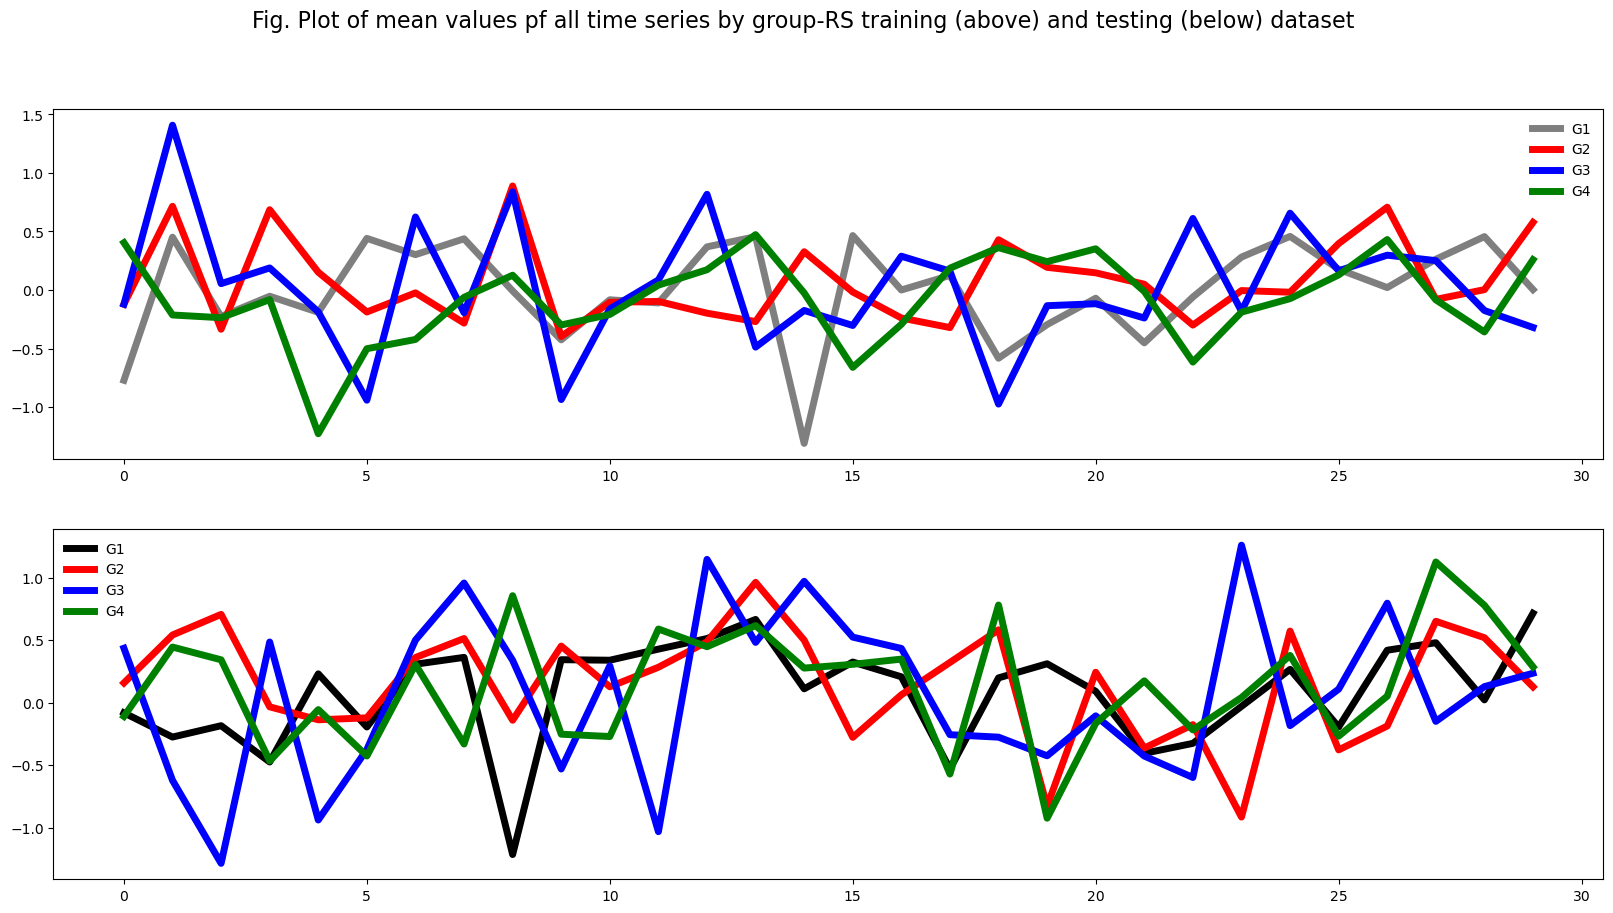

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
#f = plt.figure(figsize=(10,3))
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
#fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,30,1)
fig.suptitle("Fig. Plot of mean values pf all time series by group-RS training (above) and testing (below) dataset",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=5, alpha=0.5, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax1.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax1.plot(ejex, a.iloc[3,ejex], color='green', lw=5,  label='G4')
ax1.legend(loc='best', frameon=False)
#fig.suptitle("Fig. Plot of mean values by group-EC test dataset",fontsize=16)
ax2.plot(ejex, a1.iloc[0,ejex], color='black',lw=5, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=5, label='G2')
ax2.plot(ejex, a1.iloc[2,ejex], color='blue', lw=5,  label='G3')
ax2.plot(ejex, a1.iloc[3,ejex], color='green', lw=5,  label='G4')
ax2.legend(loc='best', frameon=False)
plt.show()

In [194]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(30,)

### Distance Training and Testing datasets

In [196]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

1.9665164153968853

### Stationarity

In [198]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
Xest = tempoB.iloc[5,0:30]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.525353
p-value: 0.000002
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628


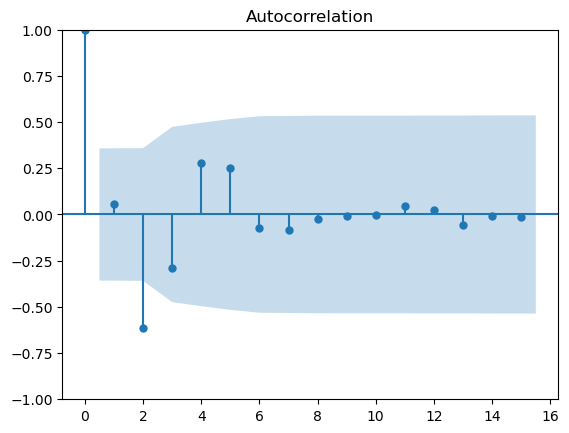

In [199]:
sm.graphics.tsa.plot_acf(Xest, alpha=.05)

In [200]:
Xest = tempoB.iloc[10,0:30]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.792189
p-value: 0.002988
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


In [201]:
Xest = tempoB.iloc[15,0:30]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.104028
p-value: 0.000000
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
